In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, r2_score
from tensorflow.keras.utils import to_categorical
import joblib

In [4]:
data_dir = "/kaggle/input/natural-disaster-image-dataset/natural_disaster_dataset"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = "/kaggle/input/natural-disaster-image-dataset/natural_disaster_dataset/train"
test_dir = "/kaggle/input/natural-disaster-image-dataset/natural_disaster_dataset/test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3322 images belonging to 4 classes.
Found 662 images belonging to 4 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 457,156 (1.74 MB)

 Trainable params: 456,196 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:

history = model.fit(
    train_generator, 
    validation_data=test_generator, 
    epochs=30, 
    verbose=1
)


model.save("cnn_model_2.h5")
print("Model saved successfully!")


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.5889 - loss: 1.3400 - val_accuracy: 0.2447 - val_loss: 2.7550
Epoch 2/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 579ms/step - accuracy: 0.7354 - loss: 0.9571 - val_accuracy: 0.2447 - val_loss: 3.5002
Epoch 3/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 572ms/step - accuracy: 0.7567 - loss: 0.8731 - val_accuracy: 0.2689 - val_loss: 3.8035
Epoch 4/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 65s 578ms/step - accuracy: 0.7975 - loss: 0.7816 - val_accuracy: 0.3882 - val_loss: 2.7866
Epoch 5/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 584ms/step - accuracy: 0.7963 - loss: 0.7819 - val_accuracy: 0.4804 - val_loss: 1.9517
Epoch 6/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 63s 570ms/step - accuracy: 0.8137 - loss: 0.7355 - val_accuracy: 0.8112 - val_loss: 0.6988
Epoch 7/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 571ms/step - accuracy: 0.8154 - loss: 0.7298 - val_accuracy: 0.7356 - val_loss: 0.9141
Epoch 8/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 65s 587ms/step - accuracy: 0.8253 - loss: 0.6586 - val_a

In [10]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-3)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step - accuracy: 0.7376 - loss: 0.9534
Test Loss: 0.7629
Test Accuracy: 0.7749

Classification Report:
              precision    recall  f1-score   support

     cyclone       0.99      0.62      0.76       139
  earthquake       0.61      0.99      0.75       201
       flood       0.88      0.65      0.75       160
    wildfire       0.96      0.77      0.86       162

    accuracy                           0.77       662
   macro avg       0.86      0.76      0.78       662
weighted avg       0.84      0.77      0.78       662

F1 Score (macro avg): 0.7789
R² Score: 0.6481
Mean Absolute Error: 0.2810


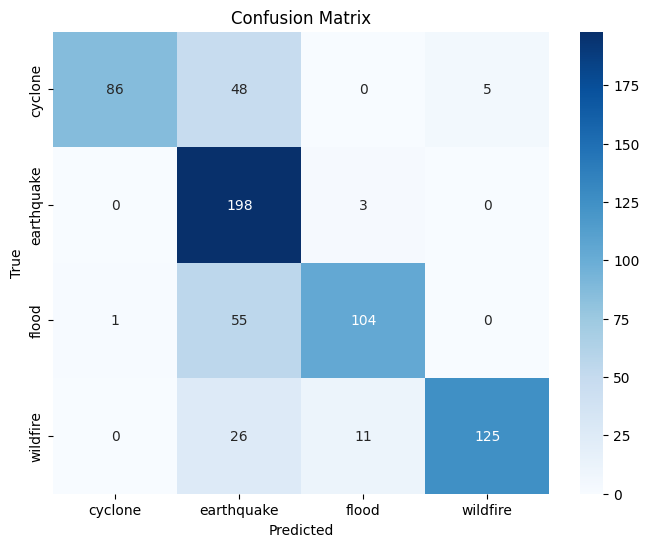

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score, mean_absolute_error
import numpy as np


y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


class_labels = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


f1 = f1_score(y_true, y_pred, average='macro')
print(f"F1 Score (macro avg): {f1:.4f}")


r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")


mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
for layer in model.layers:
    layer.trainable = True

fine_tune_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(
    optimizer=fine_tune_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

fine_tune_history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,  
    callbacks=callbacks,
    verbose=1
)

model.save("cnn_model_finetuned.h5")
print("Fine-tuned model saved as cnn_model_finetuned.h5")


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 78s 665ms/step - accuracy: 0.9029 - loss: 0.3370 - val_accuracy: 0.8882 - val_loss: 0.4016 - learning_rate: 1.0000e-05
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 67s 610ms/step - accuracy: 0.9107 - loss: 0.3163 - val_accuracy: 0.8973 - val_loss: 0.3724 - learning_rate: 1.0000e-05
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 65s 576ms/step - accuracy: 0.9249 - loss: 0.2874 - val_accuracy: 0.8958 - val_loss: 0.3660 - learning_rate: 1.0000e-05
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 67s 608ms/step - accuracy: 0.9207 - loss: 0.2926 - val_accuracy: 0.8927 - val_loss: 0.3644 - learning_rate: 1.0000e-05
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 66s 586ms/step - accuracy: 0.9317 - loss: 0.2785 - val_accuracy: 0.8958 - val_loss: 0.3622 - learning_rate: 1.0000e-05
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 65s 587ms/step - accuracy: 0.9390 - loss: 0.2686 - val_accuracy: 0.8912 - val_loss: 0.3656 - learning_rate: 1.0000e-05
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 491

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - accuracy: 0.9062 - loss: 0.3260
Fine-tuned Test Loss: 0.3552
Fine-tuned Test Accuracy: 0.8943

Classification Report (Fine-tuned):
              precision    recall  f1-score   support

     cyclone       0.96      0.95      0.95       139
  earthquake       0.92      0.86      0.89       201
       flood       0.81      0.90      0.85       160
    wildfire       0.90      0.88      0.89       162

    accuracy                           0.89       662
   macro avg       0.90      0.90      0.90       662
weighted avg       0.90      0.89      0.89       662

Fine-tuned F1 Score (macro avg): 0.8970
Fine-tuned R² Score: 0.7706
Fine-tuned Mean Absolute Error: 0.1511


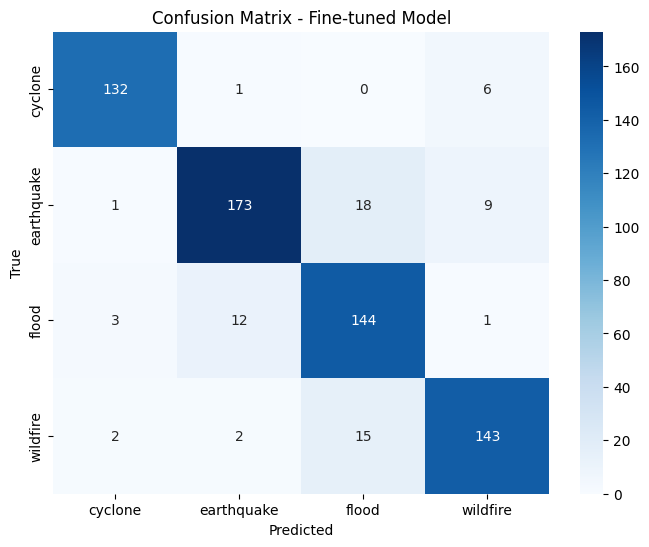

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score, mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Fine-tuned Test Loss: {test_loss:.4f}")
print(f"Fine-tuned Test Accuracy: {test_accuracy:.4f}")


class_labels = list(test_generator.class_indices.keys())


print("\nClassification Report (Fine-tuned):")
print(classification_report(y_true, y_pred, target_names=class_labels))


f1 = f1_score(y_true, y_pred, average='macro')
print(f"Fine-tuned F1 Score (macro avg): {f1:.4f}")


r2 = r2_score(y_true, y_pred)
print(f"Fine-tuned R² Score: {r2:.4f}")


mae = mean_absolute_error(y_true, y_pred)
print(f"Fine-tuned Mean Absolute Error: {mae:.4f}")


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Fine-tuned Model')
plt.show()


<ipython-input-14-3f1a778b7202>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(class_labels))


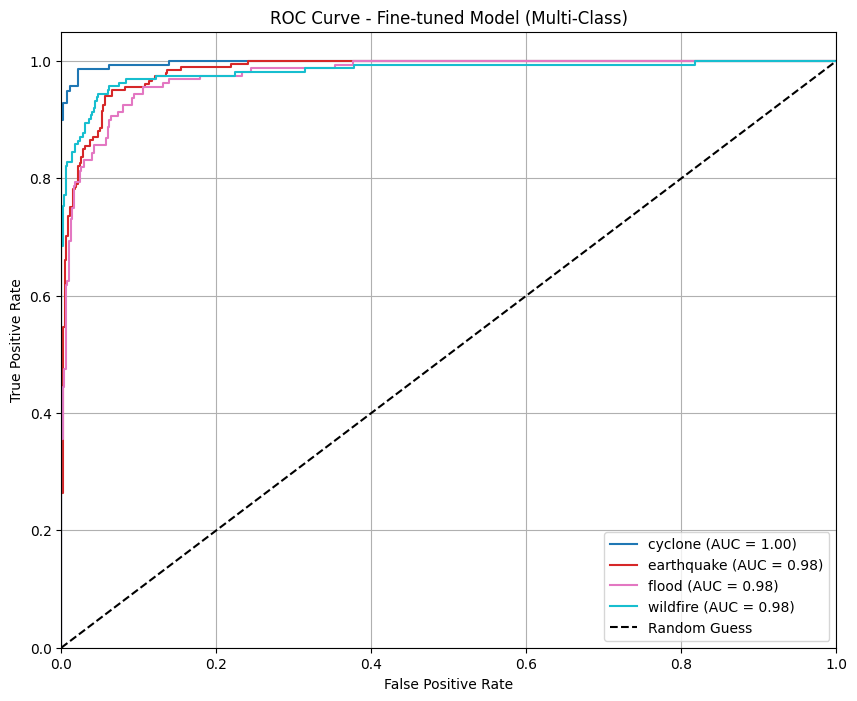

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_true_binarized = label_binarize(y_true, classes=range(len(class_labels)))


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', len(class_labels))

for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Fine-tuned Model (Multi-Class)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


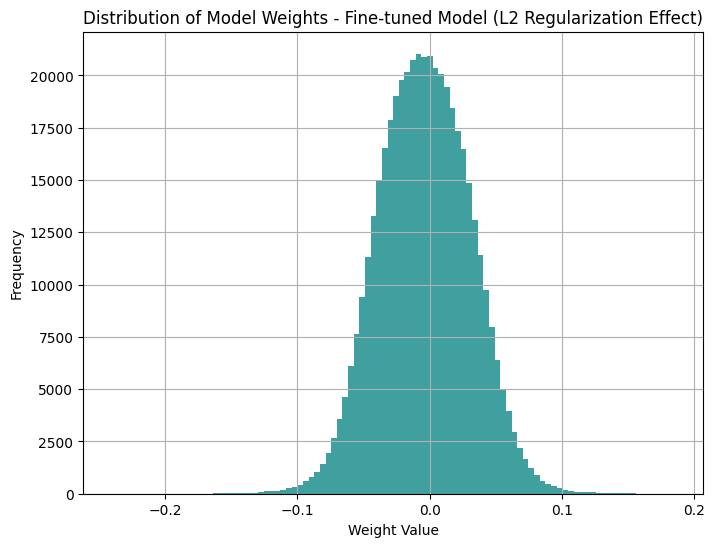

In [15]:

all_weights = []

for layer in model.layers:
    if hasattr(layer, 'kernel') and layer.kernel is not None:
        weights = layer.get_weights()[0].flatten()
        all_weights.extend(weights)


plt.figure(figsize=(8, 6))
plt.hist(all_weights, bins=100, color='teal', alpha=0.75)
plt.title("Distribution of Model Weights - Fine-tuned Model (L2 Regularization Effect)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


<ipython-input-16-3bf222e65b55>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(class_labels))


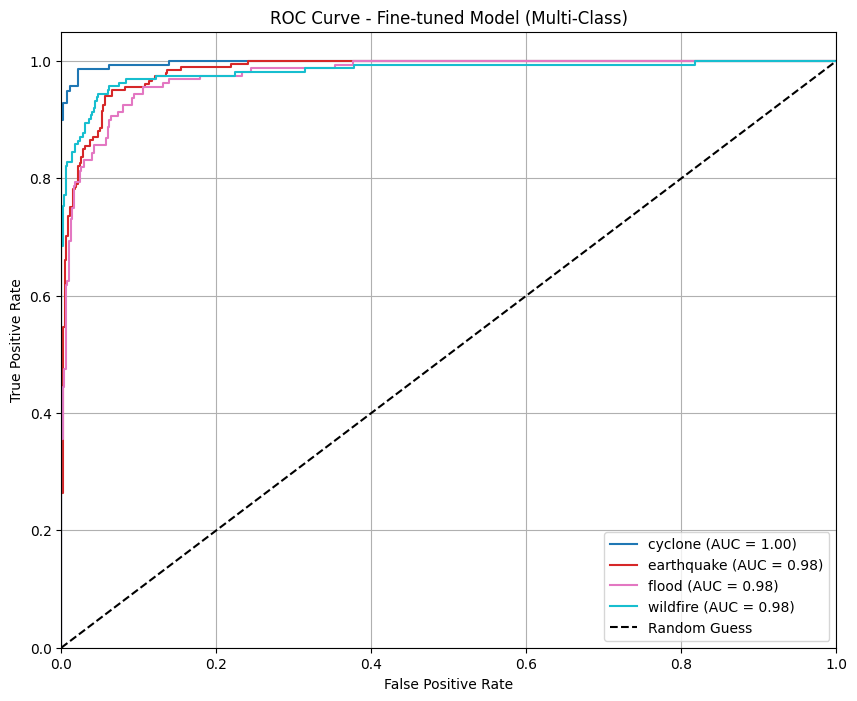

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_binarized = label_binarize(y_true, classes=range(len(class_labels)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', len(class_labels))

for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Fine-tuned Model (Multi-Class)')
plt.legend(loc='lower right')
plt.grid(True)

# Save the figure
plt.savefig('roc_auc_curve.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(l2_losses, label='L2 Loss (Regularization)', color='green')
plt.xlabel('Epoch')
plt.ylabel('L2 Loss')
plt.title('L2 Regularization Loss over Epochs')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('l2_regularization_loss.png', dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'l2_losses' is not defined

<Figure size 800x600 with 0 Axes>

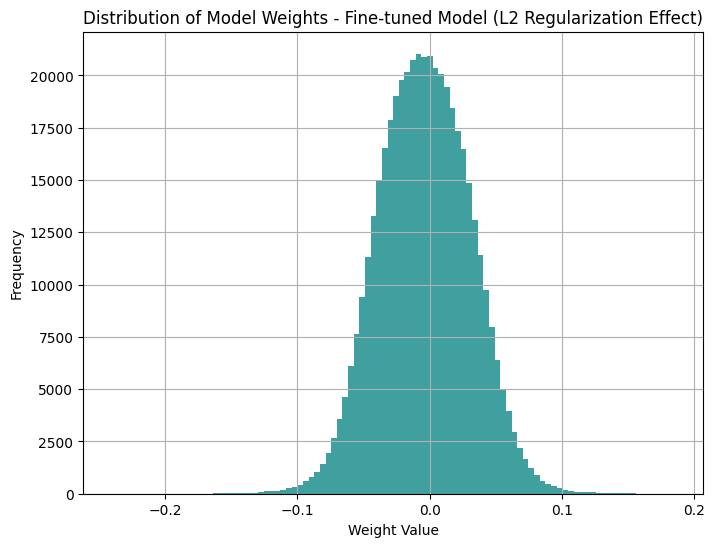

In [18]:
import matplotlib.pyplot as plt

all_weights = []

for layer in model.layers:
    if hasattr(layer, 'kernel') and layer.kernel is not None:
        weights = layer.get_weights()[0].flatten()
        all_weights.extend(weights)

plt.figure(figsize=(8, 6))
plt.hist(all_weights, bins=100, color='teal', alpha=0.75)
plt.title("Distribution of Model Weights - Fine-tuned Model (L2 Regularization Effect)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid(True)

# Save the histogram
plt.savefig('l2_weight_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


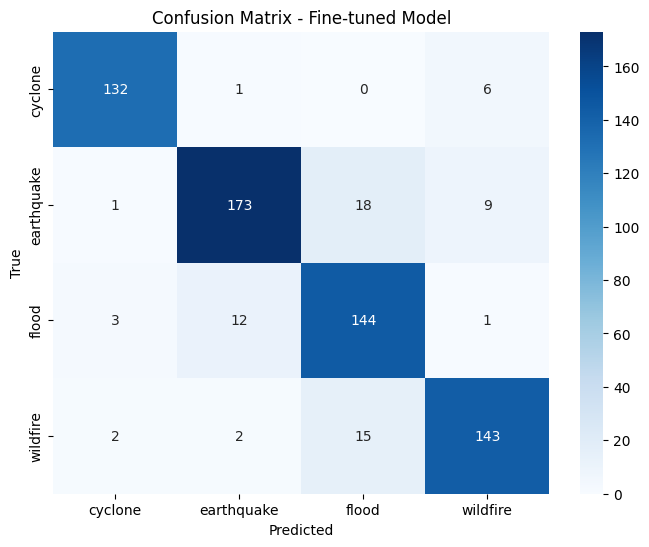

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Fine-tuned Model')

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
